In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv('/content/USA_Housing (1).csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
#ind & dep

X=df[['Price']]
y=df['Area Population']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
X_train.shape,X_test.shape

((3500, 1), (1500, 1))

In [18]:
#standardisation
from sklearn .preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train

array([[-0.97127099],
       [ 0.41327596],
       [-0.25530012],
       ...,
       [ 0.25313986],
       [ 1.34557881],
       [-0.46864797]])

In [19]:
# simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [22]:
y_pred=lr.predict(X_test)
y_pred

array([37188.40192178, 36154.99664787, 37200.22591574, ...,
       38772.10746554, 38024.88614577, 33288.18329393])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

81701054.00290018
7230.661423485482


In [43]:
X_train.corr()

,Price
Price,1.0


<Axes: >

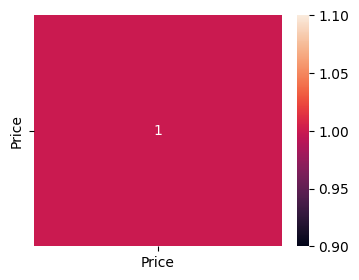

In [51]:
#checking for multicollineaity
plt.figure(figsize=(4,3))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

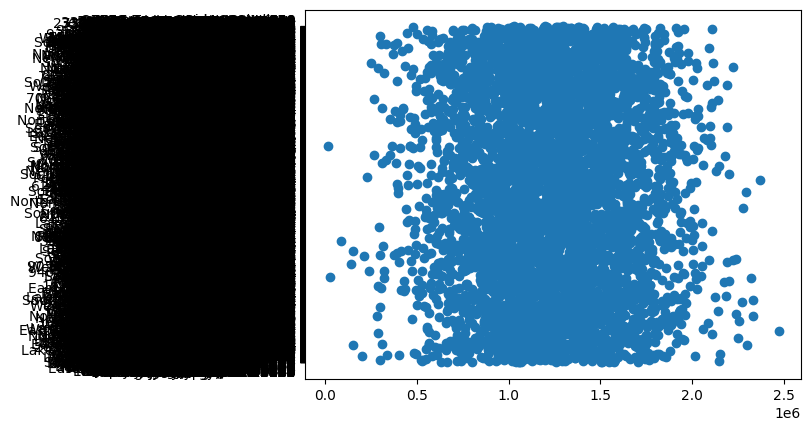

In [54]:
plt.scatter(df['Price'],df['Address'])
plt.xlabel=('price')
plt.ylabel=('Address')
plt.show()